# El mejor portafolio de inversión

<span style="color:gray"> Proyecto Módulo 1 </span>
* Joaquín Uriel Ramírez
* Daniel Orozco

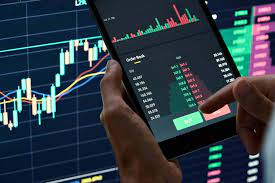

___
## Objetivo general
> #### Determinar la cantidad a invertir en cada una de un conjunto de acciones bursátiles con el propósito de maximizar ganancias.

## Objetivos específicos
> * Identificar las restricciones deseadas para el problema para minimizar riesgo.
> * Investigar los rendimientos esperados de los activos.
> * Programar el problema de optimización.

## Datos

### Rendimientos esperados

Se seleccionaron 6 acciones con alta bursatilidad de distintos sectores. Los rendimientos esperados que fueron considerados son los precios objetivo que las calificadoras les han asignado a estas empresas para un lapso de 12 meses.

1. Walmart: 16.78%
2. Alphabet: 42.6%
3. Disney: 43.46%
4. Tesla: 12.19%
5. JP Morgan: 25.19%
6. Coca Cola: 19.13%
*Fuente: investing.com*

### Beta

La Beta es una medida de volatilidad de un activo con respecto al mercado.
* Si $ \beta > 1 $ el activo registra mayor volatilidad que el ínidice
* Si $ \beta = 1 $ el activo registra la misma volatilidad que el ínidice
* Si $ \beta < 1 $ el activo registra menor volatilidad que el ínidice

Para este portafolio se plantea $ \beta \leq 1 $, pues se quiere un portafolio similar al mercado, o incluso con menos volatilidad.

Los precios utilizados para el cálculo de Beta fueron obtenidos del 13 de septiembre de 2021 al 13 de septiembre de 2022. Cálculo hecho en el archivo `Acciones consideradas.csv` adjuntado en la carpeta del proyecto.

1. Walmart: 0.3925
2. Alphabet: 1.3283
3. Disney: 1.0676
4. Tesla: 1.9019
5. JP Morgan: 0.8720
6. Coca Cola: 0.4653
*Fuente: Yahoo Finance y cálculo propio*

## Modelado del problema

#### Función a optimizar
$$ \max_{x_1,\dots,x_6}0.1678x_{1} + 0.4260x_{2} + 0.4346x_{3} + 0.1219x_{4} + 0.2519x_{5} + 0.1913x_{6} $$

#### Restricciones

1. La cantidad de dinero a invertir es de 1,000,000.00 
 $$ \sum^{6}_{i=1} x_i \leq $1,000,000.00 $$
2. Para evitar riesgo sistémico, no se puede invertir más de 40% en una sola acción.
3. Por la misma razón que la restricción anterior y al ser de diferente sector cada acción se determina que se debe de invertir al menos 10% en cada una ellas.
 $$ $100,000.00 \leq x_1 \leq $400,000.00 $$
 $$ $100,000.00 \leq x_2 \leq $400,000.00 $$
 $$ $100,000.00 \leq x_3 \leq $400,000.00 $$
 $$ $100,000.00 \leq x_4 \leq $400,000.00 $$
 $$ $100,000.00 \leq x_5 \leq $400,000.00 $$
 $$ $100,000.00 \leq x_6 \leq $400,000.00 $$
4. La Beta total del portafolio con respecto al S&P500 no debe de ser mayor a 1.
 $$ \sum^{6}_{i=1} \frac{1}{1000000} \beta_i x_i \leq 1 $$


## Programación del problema

In [1]:
# librerías
import scipy.optimize as opt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# vector c de costos (en este caso como queremos maximizar, utilizamos los rendimientos negativos)
c = np.array([-0.1678, -0.426, -0.4346, -0.1219, - 0.2519, -0.1913])

# vector b de desigualdades de restricciones
b = np.array([1000000,400000,400000,400000,400000,400000,400000,-100000,-100000,-100000,-100000,-100000,-100000,1])

# matriz A de restricciones por cada variable
A = np.array([
    [1,1,1,1,1,1],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [-1,0,0,0,0,0],
    [0,-1,0,0,0,0],
    [0,0,-1,0,0,0],
    [0,0,0,-1,0,0],
    [0,0,0,0,-1,0],
    [0,0,0,0,0,-1],
    [(1/1000000*0.3925),(1/1000000*1.3283),(1/1000000*1.0676), (1/1000000*1.9019), (1/1000000*0.8720), (1/1000000*0.4653)]
])

In [4]:
# función linprog de la librería optimize para resolver el problema de progrmación lineal
r = opt.linprog(c,A,b)
r

     con: array([], dtype=float64)
     fun: -317135.68966603465
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([1.34851900e-03, 2.99999998e+05, 2.64739285e+05, 6.89407054e-04,
       3.00000000e+05, 2.99999994e+05, 2.35260724e+05, 1.92545018e-03,
       3.52607149e+04, 2.99999999e+05, 2.03610063e-04, 6.08262265e-03,
       6.47392762e+04, 1.47447721e-09])
  status: 0
 success: True
       x: array([100000.00192545, 135260.71488074, 399999.99931059, 100000.00020361,
       100000.00608262, 164739.27624846])

In [3]:
# comprobación del resultado
100000.00192545/1000000*0.3925 + 135260.71488074/1000000*1.3283 + 399999.99987409/1000000*1.0676 + 100000.00000315/1000000*1.9019 + 100000.0000055/1000000*0.8720 + 164739.27624846/1000000*0.4653

0.9999999934466001

In [13]:
# redondeo de cifras y limpieza de datos
rr = np.rint(r.x)
rl = rr.tolist()
rl

[100000.0, 135261.0, 400000.0, 100000.0, 100000.0, 164739.0]

## Resultados

### Cantidad a invertir en cada activo (pesos del portafolio)
* Walmart: 100,000 
* Alphabet: 135,261
* Disney: 400,000
* Tesla: 100,000
* JP Morgan: 100,000
* Coca Cola: 164,793

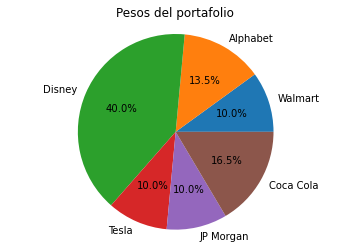

In [15]:
labels = ['Walmart', 'Alphabet', 'Disney', 'Tesla', 'JP Morgan','Coca Cola']
sizes = rl

# Gráfico de pastel para mostrar los pesos del portafolio
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal') 
ax.set_title('Pesos del portafolio')

plt.show()

## Conclusiones

Se obtuvieron las cantidades a invertir para cada activo para formar un portafolio óptimo dado un rendimiento esperado para un año. Se formularon las restricciones adecuadas para minimizar riesgo; se hicieron los cálculos para obetener Beta y se otorgaron pesos mínimos y máximos para cada activo. Se programó adecuadamente con lo cual se llegó a un resultado que favorece la inversión hacia el activo Disney, así como en menor cantidad para Alphabet y Coca Cola. Se desfavorecen los activos de Walmart, Tesla y JP Morgan.

___

## Referencias
* *Investing.com. (2022). Precio Objetivo): Estimaciones - investing.com. Investing.com Español. Retrieved September 24, 2022, from https://es.investing.com/equities/investor-consensus-estimates*
* *Finance.Yahoo.com. (2022). Quote. Yahoo Finance. Retrieved September 24, 2022, from https://finance.yahoo.com/*